In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

pio.templates.default = "plotly_white"

In [60]:
df = pd.read_excel("superstore_sales.xlsx")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [61]:
df.shape

(51290, 21)

In [62]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [64]:
df.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011


In [65]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [66]:
df.describe().round(2)

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.49,3.48,0.14,28.64,26.38,2012.78
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.44,1.00,0.00,-6599.98,0.00,2011.00
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.76,2.00,0.00,0.00,2.61,2012.00
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.05,3.00,0.00,9.24,7.79,2013.00
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.05,5.00,0.20,36.81,24.45,2014.00
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.48,14.00,0.85,8399.98,933.57,2014.00
std,NaN,NaN,487.57,2.28,0.21,174.42,57.30,1.10


# Exploratory data analysis

# 1. what is the overall sales trend?

In [67]:
totaL_sales = df["sales"].sum().round(2)
totaL_sales

12642501.91

In [68]:
# getting month year from  order_date

In [69]:
df["month_year"] = df["order_date"].apply(lambda x: x.strftime("%Y-%m"))

In [70]:
df["month_year"].unique(),df.month_year.dtype

(array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
        '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
        '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
        '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
        '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
        '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
        '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
        '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
       dtype=object),
 dtype('O'))

In [71]:
monthly_sales = df.groupby("month_year")["sales"].sum().reset_index().round(2)
monthly_sales.head()

,month_year,sales
0,2011-01,98898.49
1,2011-02,91152.16
2,2011-03,145729.37
3,2011-04,116915.76
4,2011-05,146747.84


# charts for monthly sales

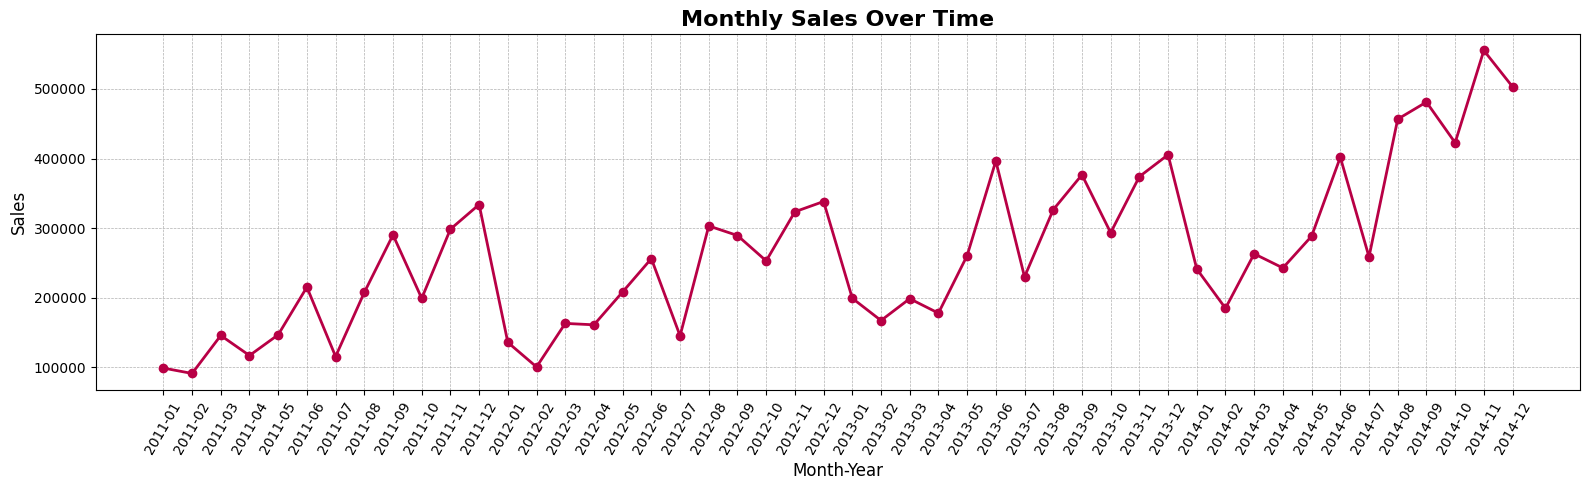

In [72]:
plt.figure(figsize=(16, 5))
plt.plot(monthly_sales["month_year"], monthly_sales["sales"], color="#b80045", marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('monthly_sales_plot.png', dpi=300)

plt.show()

In [73]:
# # Plotting the graph
# plt.figure(figsize=(16, 5))
# plt.plot(monthly_sales["month_year"], monthly_sales["sales"], color="#b80045", marker='o', linestyle='-', linewidth=2)
# plt.title('Monthly Sales Over Time', fontsize=16, fontweight='bold')
# plt.xlabel('Month-Year', fontsize=12)
# plt.ylabel('Sales', fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.yticks(fontsize=10)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# # Add values on top of each marker
# for i, txt in enumerate(monthly_sales["sales"]):
#     plt.annotate(f'{txt}', (monthly_sales["month_year"][i], monthly_sales["sales"][i]), 
#                  textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='black')

# plt.tight_layout()

# # Saving the figure
# plt.savefig('monthly_sales_with_values.png', dpi=300)

# # Show the plot
# plt.show()


# highest sales in the months

In [74]:
monthly_sales.sort_values(by="sales",ascending=False).head(1)

,month_year,sales
46,2014-11,555279.03


# 2. Sales by category

In [75]:
category_wise_sales = df.groupby("category")["sales"].sum().reset_index().round(2)
category_wise_sales

,category,sales
0,Furniture,4110874.19
1,Office Supplies,3787070.23
2,Technology,4744557.50


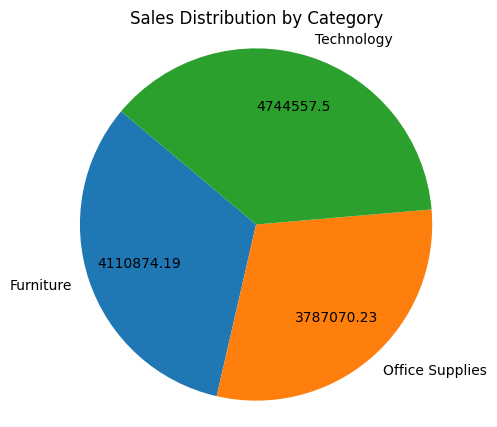

In [85]:
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    category_wise_sales['sales'], 
    labels=category_wise_sales['category'], 
    autopct='',
    startangle=140,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0, fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = wedge.r * 0.7 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.7 * np.sin(np.deg2rad(angle))
    plt.text(x, y, f"{category_wise_sales['sales'][i]}", ha='center', va='center')
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.savefig('sales_distribution_by_category.png', bbox_inches='tight')
plt.show()


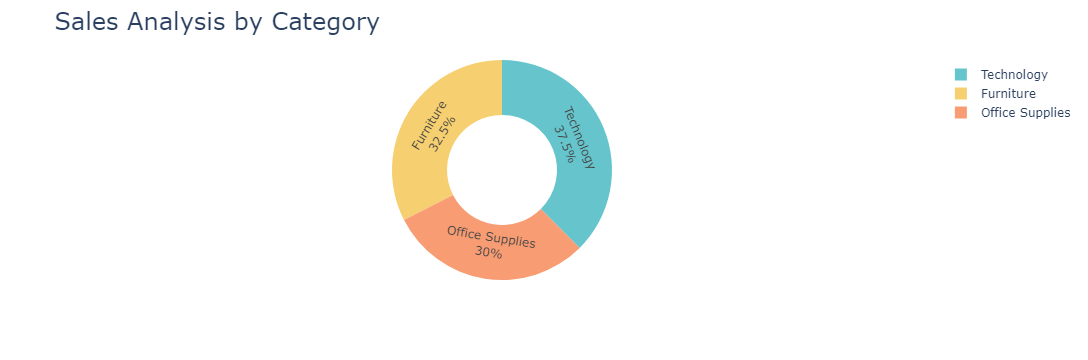

In [98]:
sales_by_category = df.groupby('category')['sales'].sum().reset_index()
fig = px.pie(sales_by_category,
values='sales',
names='category',
hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category',
                  title_font=dict(size=24))
fig.show()

# Technology has highest sales

In [102]:
sales_by_category.sort_values(by="sales",ascending=False).head(1).round(2)

,category,sales
2,Technology,4744557.5


# 3. sales by subcategory

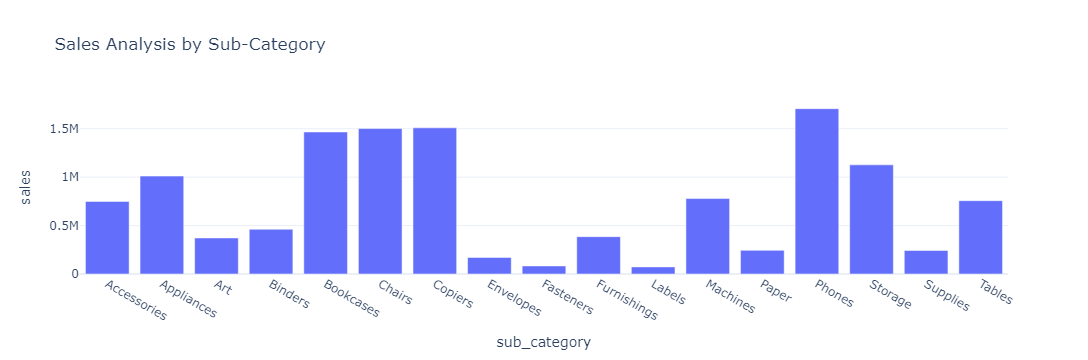

In [113]:
sales_by_subcategory = df.groupby('sub_category')['sales'].sum().reset_index()


fig = px.bar(sales_by_subcategory,
x='sub_category',
y='sales',
title='Sales Analysis by Sub-Category')
fig.show()

# 4. Monthly profit

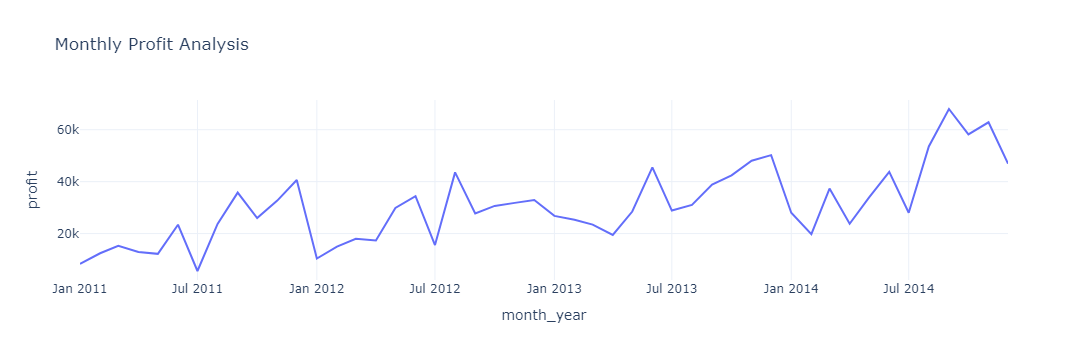

In [115]:
profit_by_month = df.groupby('month_year')['profit'].sum().reset_index()
fig = px.line(profit_by_month, x='month_year', y='profit', title='Monthly Profit Analysis')
fig.show()

# 5. Profit by category

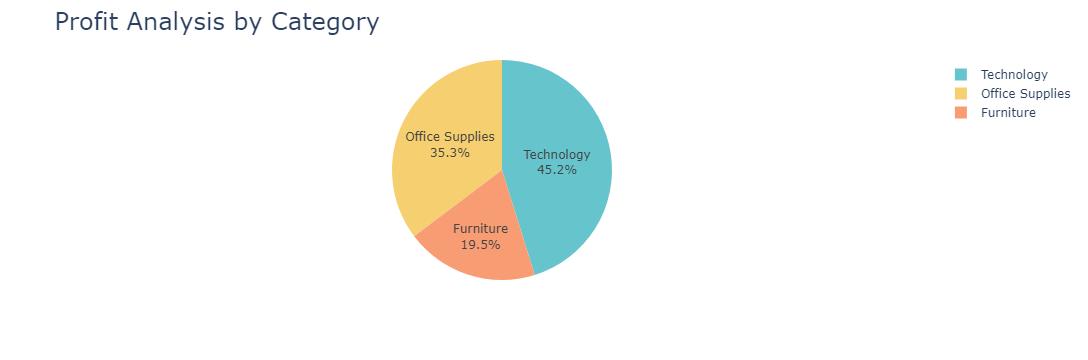

In [118]:
profit_by_category = df.groupby('category')['profit'].sum().reset_index()
fig = px.pie(profit_by_category,
values='profit',
names='category',
hole=0,
color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category',title_font=dict(size=24))
fig.show()

# 6. profit by sub-category

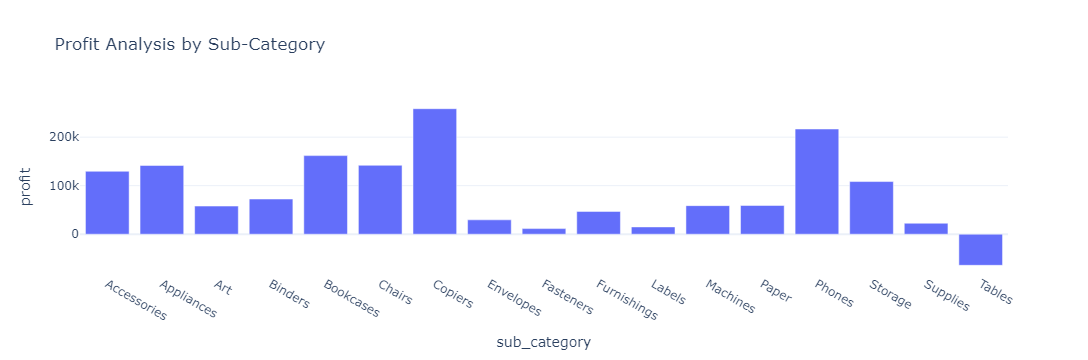

In [119]:
profit_by_subcategory = df.groupby('sub_category')['profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='sub_category',y='profit',title='Profit Analysis by Sub-Category')
fig.show()

# 7. Profit Analysis by customer segment

In [121]:
sales_profit_by_segment = df.groupby('segment').agg({'sales': 'sum', 'profit':'sum'}).reset_index().round(2)
sales_profit_by_segment.head()

,segment,sales,profit
0,Consumer,6507949.42,749239.78
1,Corporate,3824697.52,442785.86
2,Home Office,2309854.97,277009.18


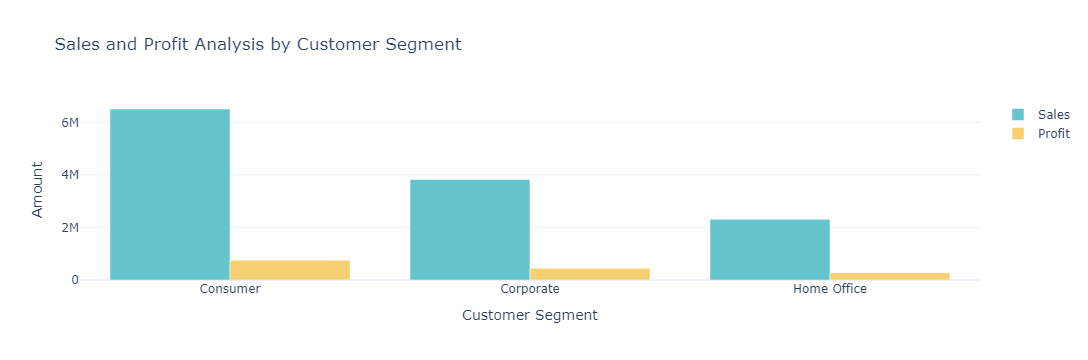

In [122]:
color_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['segment'],
y=sales_profit_by_segment['sales'],
name='Sales',
marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['segment'],
y=sales_profit_by_segment['profit'],
name='Profit',
marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
xaxis_title='Customer Segment', yaxis_title='Amount')
fig.show()

# 8. Sales to Profit Ratio

In [124]:
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['sales'] / sales_profit_by_segment['profit']
sales_profit_by_segment[['segment', 'Sales_to_Profit_Ratio']]

,segment,Sales_to_Profit_Ratio
0,Consumer,8.686070
1,Corporate,8.637804
2,Home Office,8.338550


# 9. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [133]:
top_10_product_by_sales = df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10).round(2)
top_10_product_by_sales

product_name
Apple Smart Phone, Full Size                                86935.78
Cisco Smart Phone, Full Size                                76441.53
Motorola Smart Phone, Full Size                             73156.30
Nokia Smart Phone, Full Size                                71904.56
Canon imageCLASS 2200 Advanced Copier                       61599.82
Hon Executive Leather Armchair, Adjustable                  58193.48
Office Star Executive Leather Armchair, Adjustable          50661.68
Harbour Creations Executive Leather Armchair, Adjustable    50121.52
Samsung Smart Phone, Cordless                               48653.46
Nokia Smart Phone, with Caller ID                           47877.79
Name: sales, dtype: float64

# 10. WHICH ARE THE MOST SELLING PRODUCTS?

In [130]:
best_selling_product = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)
best_selling_product

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

# 11. WHAT IS THE MOST PREFERRED SHIP MODE?

C:\Users\Suren\AppData\Local\Temp\ipykernel_9388\421349061.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




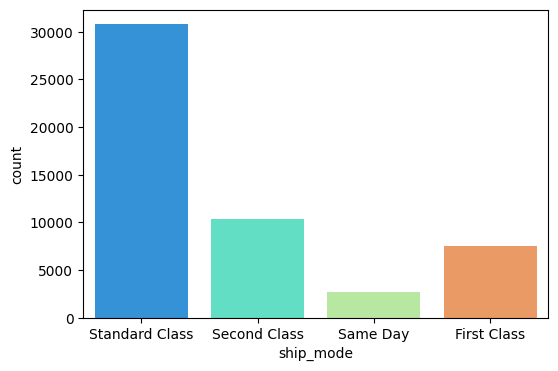

In [137]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ship_mode', data=df,palette="rainbow")
plt.show()

# 12. WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [141]:
profitable_cat_subCat = df.groupby(["category","sub_category"])["profit"].sum().sort_values(ascending=False).round(2)
profitable_cat_subCat

category         sub_category
Technology       Copiers         258567.55
                 Phones          216717.01
Furniture        Bookcases       161924.42
                 Chairs          141973.80
Office Supplies  Appliances      141680.59
Technology       Accessories     129626.31
Office Supplies  Storage         108461.49
                 Binders          72449.85
                 Paper            59207.68
Technology       Machines         58867.87
Office Supplies  Art              57953.91
Furniture        Furnishings      46967.43
Office Supplies  Envelopes        29601.12
                 Supplies         22583.26
                 Labels           15010.51
                 Fasteners        11525.42
Furniture        Tables          -64083.39
Name: profit, dtype: float64